In [8]:
import matplotlib.pyplot as plt

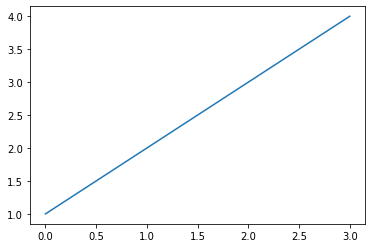

In [ ]:
plt.plot([1,2,3,4])

In [ ]:
plt.show() # Видимо в colab уже включён интерактивный режим

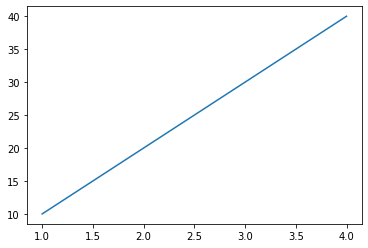

In [ ]:
plt.plot([1,2,3,4], [10, 20, 30, 40])

In [ ]:
import torch

In [ ]:
x = torch.arange(0, 10)
y = torch.arange(0, 100, 10)

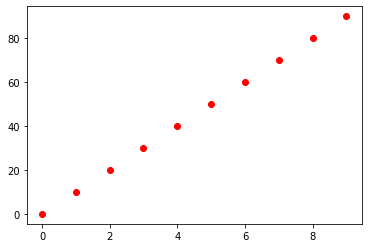

In [ ]:
plt.plot(x, y, 'ro') # Спокойно работает с тензорами

In [ ]:
x = torch.arange(0, 10)
y = x**2
print(y)

tensor([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])


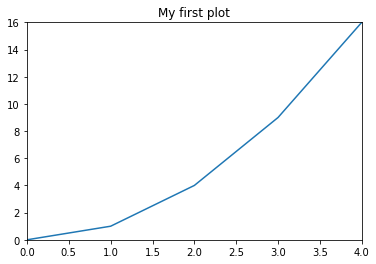

In [ ]:
plt.axis([0, 4, 0, 16])
plt.title('My first plot')
plt.plot(x, y)

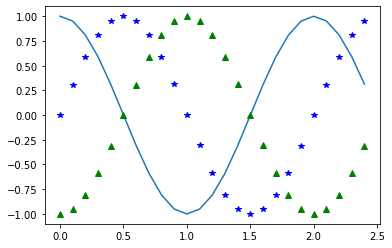

In [ ]:
x = torch.arange(0, 2.5, 0.1)
y1 = torch.sin(3.14 * x)
y2 = torch.sin(1.57 + 3.14 * x)
y3 = torch.sin(3.14 * x - 1.57)
# Можно сразу много
plt.plot(x, y1, 'b*', x, y2, x, y3, 'g^') # Имеется возможность упустить позиционный аргуент окраски

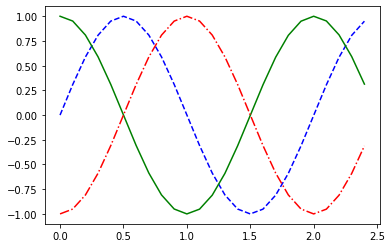

In [ ]:
plt.plot(x,y1,'b--',x,y2,'g',x,y3,'r-.')

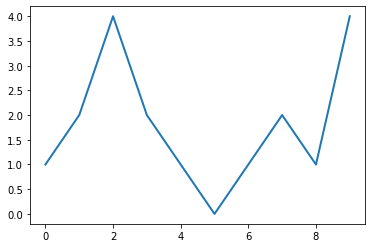

In [ ]:
# Имеется возможность передавать и именованные аргументы
plt.plot([1,2,4,2,1,0,1,2,1,4], linewidth=2.0)

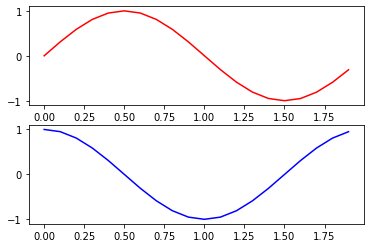

In [ ]:
plt.subplot(211) # 2 - разделение по вертикали, 1 - разделение по горизонтали, 1 - текущий график
x = torch.arange(0, 2, 0.1)
y = torch.sin(x * 3.14)
plt.plot(x, y, 'r')
plt.subplot(212)
y = torch.cos(x * 3.14)
plt.plot(x, y, 'b')

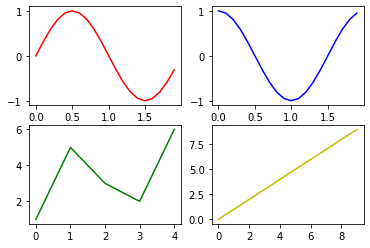

In [ ]:
# Индексация идёт сначала по горизонтали, потом по вертикали
plt.subplot(221)
x = torch.arange(0, 2, 0.1)
y = torch.sin(x * 3.14)
plt.plot(x, y, 'r')

plt.subplot(222)
y = torch.cos(x * 3.14)
plt.plot(x, y, 'b')

plt.subplot(223)
x = [1,5,3,2,6]
plt.plot(x, 'g')

plt.subplot(224)
x = torch.arange(10)
plt.plot(x, 'y')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


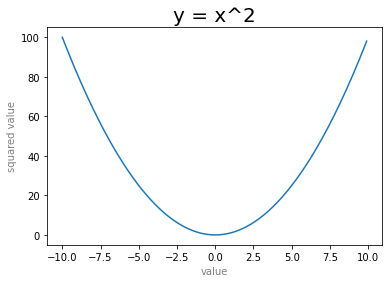

In [ ]:
x = torch.arange(-10, 10, 0.1)
y = x**2

plt.title('y = x^2', fontsize=20, fontname='Times New Roman')
plt.xlabel('value', color='gray')
plt.ylabel('squared value', color='gray')
# plt.axis()
plt.plot(x, y)

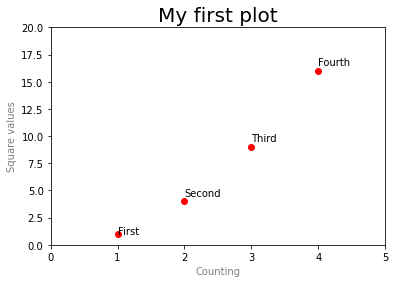

In [ ]:
plt.axis([0,5,0,20])
plt.title('My first plot', fontsize=20, fontname='Times New Roman')
plt.xlabel('Counting', color='gray')
plt.ylabel('Square values',color='gray')
plt.text(1,1,'First') # Тупо делаем отступ от нужной точки
plt.text(2,4.5,'Second')
plt.text(3,9.5,'Third')
plt.text(4,16.5,'Fourth')
plt.plot([1,2,3,4],[1,4,9,16],'ro')

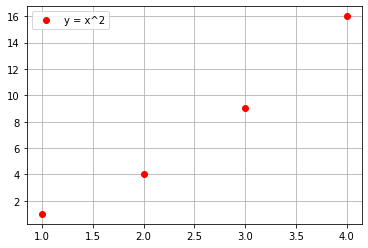

In [ ]:
plt.grid(True) # Сетка
#plt.legend(['y = x^2']) # Должна быть после плота
plt.plot([1,2,3,4],[1,4,9,16],'ro')
plt.legend(['y = x^2']) # Легенда

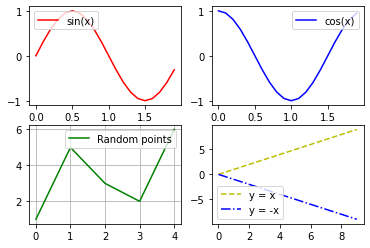

In [ ]:
plt.subplot(221)
x = torch.arange(0, 2, 0.1)
y = torch.sin(x * 3.14)
plt.plot(x, y, 'r')
plt.legend(['sin(x)'], loc=2) # Разные места для легенды

plt.subplot(222)
y = torch.cos(x * 3.14)
plt.plot(x, y, 'b')
plt.legend(['cos(x)'], loc=1)

plt.subplot(223)
plt.grid(True)
x = [1,5,3,2,6]
plt.plot(x, 'g')
plt.legend(['Random points'], loc=0)

plt.subplot(224)
x = torch.arange(10)
plt.plot(x, x, 'y--', x, -x, 'b-.')
plt.legend(['y = x', 'y = -x'], loc=3)

In [ ]:
import torchvision.transforms as T
import torchvision.datasets as dset

transform = T.Compose([
                T.ToTensor()
            ])

cifar10_train = dset.CIFAR10(root="/root/sample_data", train=True, transform=transform, download=True)
cifar10_test = dset.CIFAR10(root="/root/sample_data", train=False, download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /root/sample_data/cifar-10-python.tar.gz to /root/sample_data
Files already downloaded and verified


In [ ]:
x, y = cifar10_train.__getitem__(1)

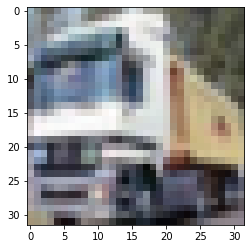

In [ ]:
plt.imshow(x.permute(1, 2, 0))

In [ ]:
transform = T.Compose([
                T.ToTensor(),
                T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
            ])

In [ ]:
cifar10_train_without_transform = dset.CIFAR10(root="/root/sample_data", train=True, transform=None, download=True) # Похоже ToTensor здесь не нужен

Files already downloaded and verified


In [ ]:
x, y = cifar10_train.__getitem__(1)

In [ ]:
cifar10_train_with_normalize = dset.CIFAR10(root="/root/sample_data", train=True, transform=transform, download=True)
x, y = cifar10_train_with_normalize.__getitem__(1)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


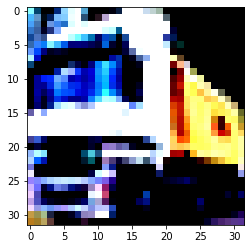

In [ ]:
plt.imshow(x.permute(1,2,0))

In [ ]:
names = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}


In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import sampler

dl = DataLoader(dataset=cifar10_train, batch_size=9, sampler=sampler.SubsetRandomSampler(range(0, 50000)))

In [ ]:
# Неудачный эксперимент с DataLoader
# fl = False
# for i, (x, y) in enumerate(dl):
#   for j in range(x.shape[0]):

#     if i == 8 and j == 1:
#       fl = True
#       break
#     plt.subplot(9, 9, i * 10 + j + 1, figsize=(20,20))
#     img = x[j]
#     name = names[int(y[j])]
#     plt.imshow(img.permute(1, 2, 0))
#     plt.title(name)
  
#   if fl:
#     break

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

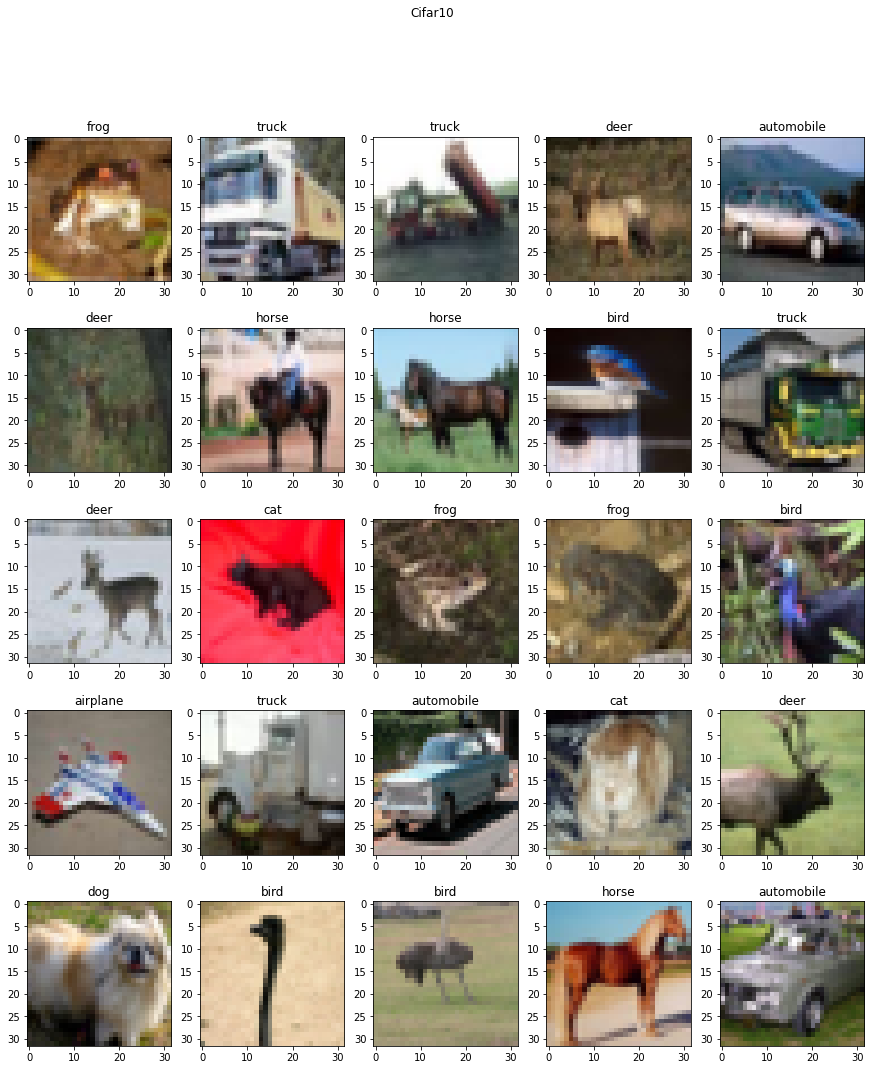

In [ ]:
plt.figure(figsize=[15, 17])
plt.suptitle('Cifar10')
for i in range(5):
  for j in range(5):
    x, y = cifar10_train.__getitem__(10 * i + j)
    plt.subplot(5, 5, i * 5 + j + 1)
    plt.imshow(x.permute(1, 2, 0))
    plt.title(names[y])

Files already downloaded and verified


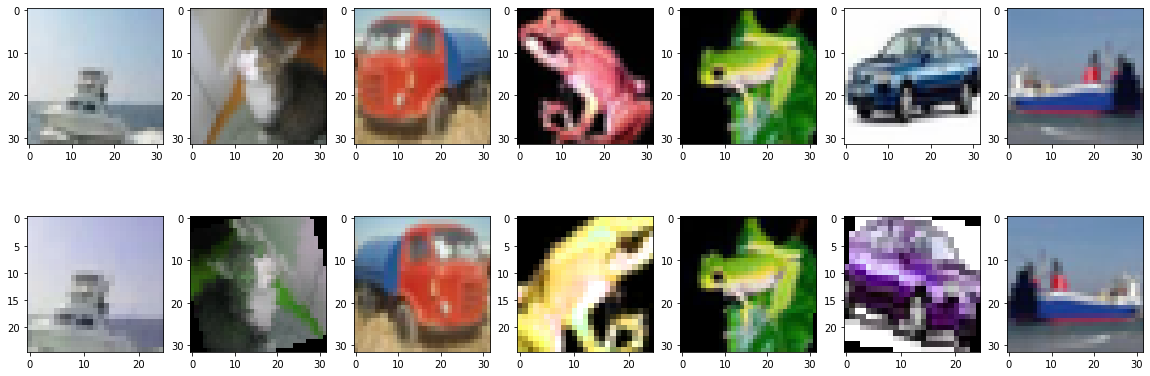

In [102]:
# import torchvision.transforms as T
# import torchvision.datasets as dset

myTransform = T.Compose([
                         T.ToTensor(), # По умолчанию там не тензор, а img
                         # RandAppl принимает список преобразований и применяет их с вероятностью
                         T.RandomApply([T.CenterCrop((25, 25))], p=0.5), # Вырезает центр из картинки
                         T.RandomApply([T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)], p=0.5), # Дрожание яркости, контраста, насыщенности, оттенка
                         T.RandomHorizontalFlip(p=0.5),
                         T.RandomApply([T.RandomRotation(degrees=(-15, 15))], p=0.5)
                        #  T.FiveCrop((16, 16)) # Режет на пять картинок заданного размера
])

train_set_composed = dset.CIFAR10('/root/sample_data', transform=myTransform, download=True)
# train_set = dset.CIFAR10('/root/sample_data', download=True)

print_img_to_compare(train_set, train_set_composed, 100)

In [101]:
def print_img_to_compare(set, set_composed, num_image=0):
  plt.figure(figsize=[20, 7])
  for i in range(7):
    plt.subplot(2, 7, i + 1)
    img, _ = set.__getitem__(i + num_image)
    plt.imshow(img)
    plt.subplot(2, 7, i + 8)
    img, _ = set_composed.__getitem__(i + num_image)
    plt.imshow(img.permute(1, 2, 0))

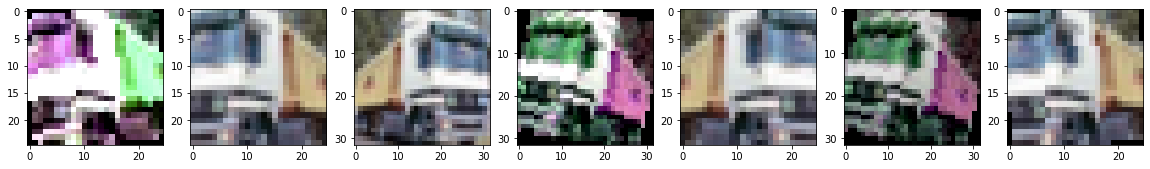

In [98]:
# Преобразования производятся при извлечении итема, то есть рандомные штуки делаются рандомно каждый раз
plt.figure(figsize=[20, 7])
for i in range(7):

  img, _ = train_set_composed.__getitem__(1)
  plt.subplot(1, 7, i+1)
  plt.imshow(img.permute(1, 2, 0))

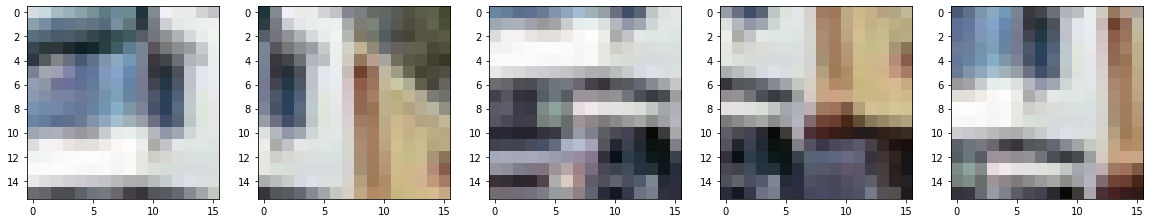

In [65]:
plt.figure(figsize=[20, 7])
a, _ = train_set_composed.__getitem__(1)  
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(a[i].permute(1, 2, 0))